# DATA SCIENCE & BUSINESS ANALYTICS INTERN

## The Sparks Foundation

## GRIPJULY21

## Name: Suraj Akula

## Task 5 : Exploratory Data Analysis - Sports
                      (Level - Advanced)

### Importing all the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Export The Data Sets

In [3]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

### Exploring the Data Sets

In [4]:
print('Shape of Deliveries: ',deliveries.shape)
print('Shape of Matches:    ',matches.shape)

Shape of Deliveries:  (179078, 21)
Shape of Matches:     (756, 18)


In [5]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
matches.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


### Null value checking

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
matches.drop(['umpire3'],axis=1,inplace=True)

In [11]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [12]:
print('\nTotal number of IPL-Seasons played: ',matches.season.nunique())
print('\nList of Teams played in IPL :\n  \n',np.unique(matches[['team1','team2']].values))


Total number of IPL-Seasons played:  12

List of Teams played in IPL :
  
 ['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


In [13]:
print('Total number of MATCHES PLAYED :',len(deliveries['match_id'].unique()))
print('Total number of RUNS SCORED by the batsman :',deliveries.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries.noball_runs.sum())
print('Total number of BYE RUNS :',deliveries.bye_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries.penalty_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries[deliveries.is_super_over==1].match_id.nunique())

Total number of MATCHES PLAYED : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


### Number of matches played in each season

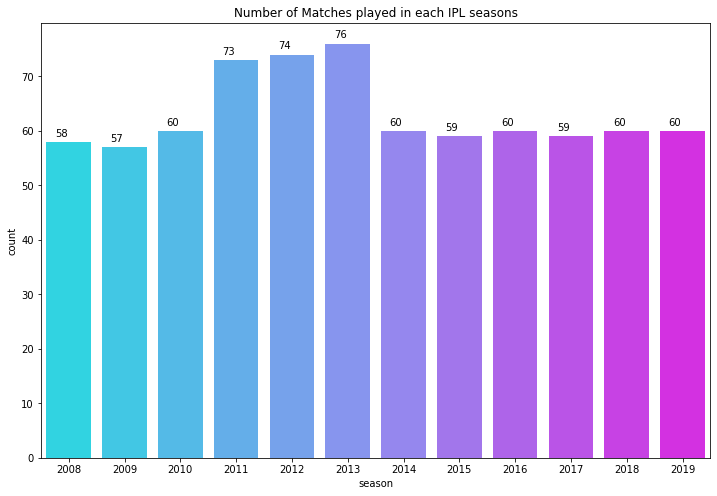

In [14]:
plt.figure(figsize=(12,8))
plt.title('Number of Matches played in each IPL seasons')
ax=sns.countplot(x=matches.season, palette="cool")
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Top 10 Man of the Match

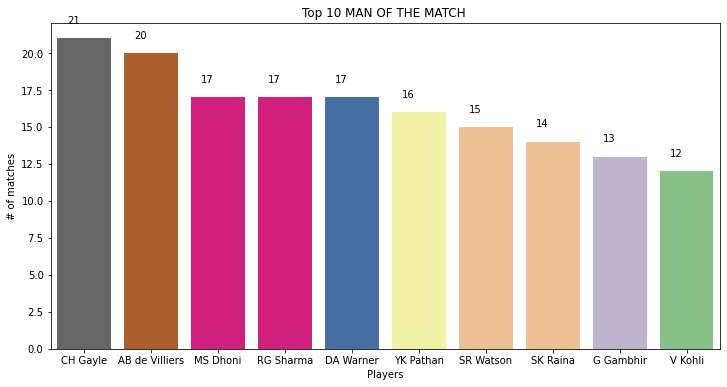

In [15]:
plt.figure(figsize=(12,6))
plt.title('Top 10 MAN OF THE MATCH ')
ax=sns.countplot(x=matches.player_of_match,order = matches.player_of_match.value_counts()[:10].index, palette="Accent_r")
ax.set_ylabel('# of matches')
ax.set_xlabel('Players')
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Number of Matches won by Each IPL Team

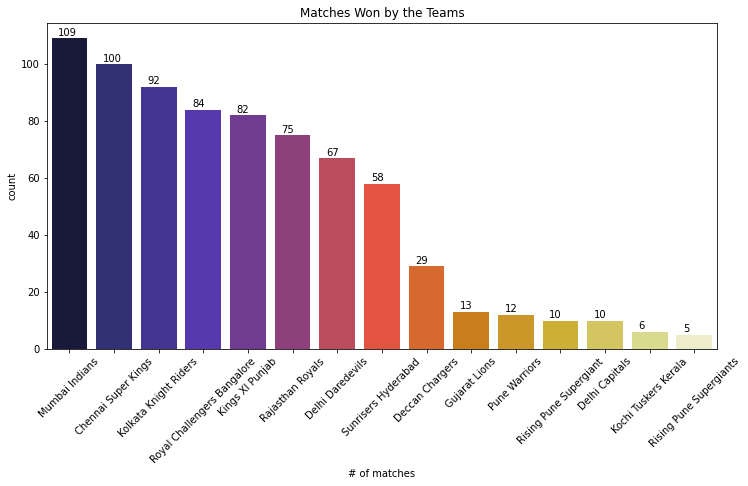

In [16]:
plt.figure(figsize=(12,6))
plt.title('Matches Won by the Teams')
ax=sns.countplot(x=matches['winner'],order = matches['winner'].value_counts().index, palette = 'CMRmap')
ax.set_xlabel('# of matches')
plt.xticks(rotation=45)
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Matches played vs Matches won and Percentage of won matches

In [19]:
total_matches= pd.concat([matches.team1,matches.team2])
total_matches = total_matches.value_counts().reset_index()
total_matches.columns = ['Team','Total_Matches']
won_team = matches.winner.value_counts().reset_index()
won_team.columns = ['Team','Matches_won']
win_data= won_team[['Team','Matches_won']].merge(total_matches, left_on = 'Team', right_on = 'Team', how = 'right')
win_data['win_percent'] =  round((win_data.Matches_won/win_data['Total_Matches'])*100,1)

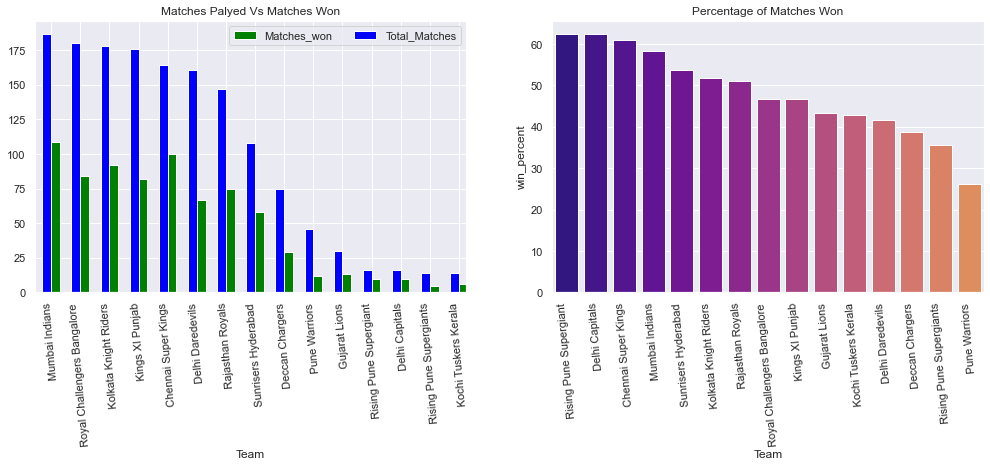

In [22]:
fig, ax =plt.subplots(1,2,figsize=(17,5))
sns.set()
df = win_data.set_index('Team')
width=0.3
df.Matches_won.plot(kind='bar',color='green',ax=ax[0],width=width, position=0)
df.Total_Matches.plot(kind='bar',color='blue',width = width,position=1,ax=ax[0])
ax[0].legend(ncol = 2, loc = 'upper right')
sns.barplot(y='win_percent',x='Team',data=win_data[['Team','win_percent']].sort_values(by='win_percent',ascending=False)
                 ,palette=sns.color_palette('plasma',20),ax=ax[1])
ax[0].tick_params('x', labelrotation=95)
ax[1].tick_params('x', labelrotation=95)
ax[0].set_title('Matches Palyed Vs Matches Won')
ax[1].set_title('Percentage of Matches Won')
plt.show()

### Most utilized venues

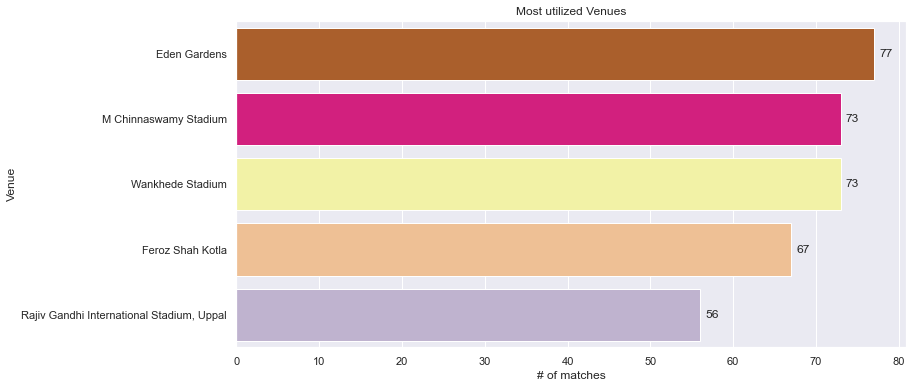

In [23]:
plt.figure(figsize=(12,6))
plt.title('Most utilized Venues')
ax=sns.countplot(y=matches['venue'],order = matches['venue'].value_counts()[0:5].index, palette="Accent_r")
ax.set_xlabel('# of matches')
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_ylabel('Venue')
plt.show()

### Toss decision

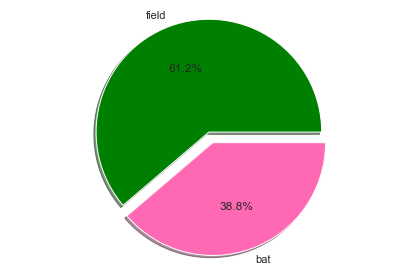

In [24]:
toss_decision = matches.toss_decision.value_counts(normalize=True)
colors = ["green", "hotpink"]
explode = (0.05,0.05)
plt.pie(toss_decision,labels=toss_decision.index,autopct='%1.1f%%',explode=explode,colors = colors, shadow = True)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Average runs per match across seasons

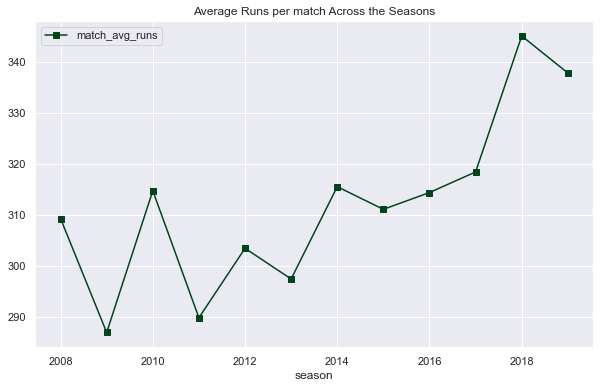

In [25]:
delivery_metrics= matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
x = delivery_metrics.groupby('batting_team')['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs'].sum()
x.style.background_gradient(cmap='coolwarm')

temp = delivery_metrics.groupby(['season','match_id'])['total_runs'].sum().reset_index() #.drop('match_id')
temp.columns = ['season','match_id','match_avg_runs']
temp = temp.groupby('season')['match_avg_runs'].mean().reset_index()
cm = plt.cm.get_cmap('hot')
temp.set_index('season').plot(marker='s',colormap='Greens_r')
plt.gcf().set_size_inches(10,6)
plt.title('Average Runs per match Across the Seasons')
plt.show()

### Top wicket taker

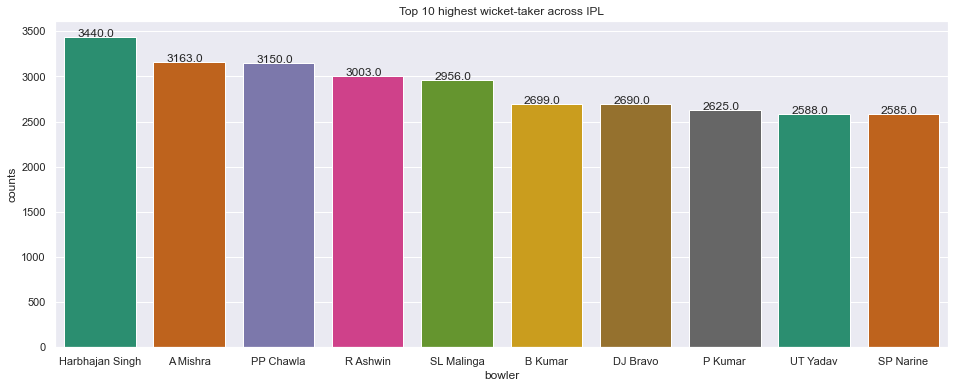

In [26]:
high_wickettaker_all = delivery_metrics[delivery_metrics.player_dismissed != 0]

high_wickettaker_all = high_wickettaker_all[(high_wickettaker_all.dismissal_kind !='retired hurt') & (high_wickettaker_all.dismissal_kind !='obstructing the field'
) & (high_wickettaker_all.dismissal_kind !='run out') ]
high_wickettaker = high_wickettaker_all.bowler.value_counts().reset_index()
high_wickettaker = pd.DataFrame(high_wickettaker)
high_wickettaker.columns = ['bowler','counts']
high_wickettaker = high_wickettaker.sort_values(by='counts',ascending=False)
plt.subplots(figsize=(16,6))
plt.title('Top 10 highest wicket-taker across IPL')
ax = sns.barplot(y='counts',x='bowler',data=high_wickettaker[:10],palette=sns.color_palette('Dark2',20))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Harbhajan Singh is the highest wicket taker with 3440 wickets.

### Purple Cap Player

['DL Chahar'] won the PURPLE CAP in IPL-  2019


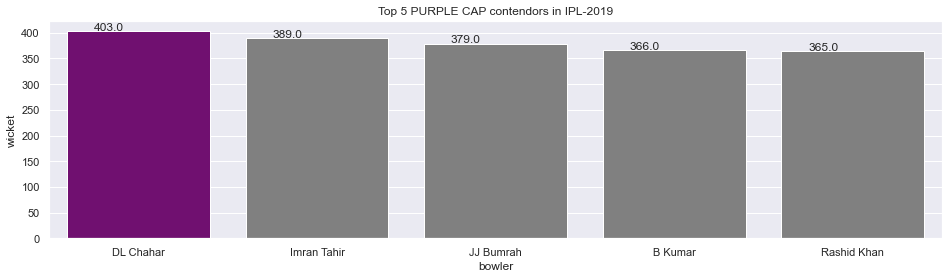

In [28]:
def purple_cap(season):
        purple_cap = high_wickettaker_all[high_wickettaker_all.season==season]
        purple_cap = purple_cap.bowler.value_counts().reset_index()
        purple_cap.columns = ['bowler','wicket']
      #purple_cap.head(5)
        plt.subplots(figsize=(16,4))
        plt.title('Top 5 PURPLE CAP contendors in IPL-'+str(season))
        values = purple_cap.wicket[:5]
        print(str(list(purple_cap.bowler[:1]))+' won the PURPLE CAP in IPL- ',str(season))
        clrs = ['grey' if (x < max(values)) else 'purple' for x in values ]
        ax=sns.barplot(x='bowler', y='wicket',data=purple_cap[:5], palette=clrs) # color=clrs)
        for p in ax.patches:
            ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
        plt.show()
purple_cap(2019)

['DA Warner'] won the ORANGE CAP in IPL-  2019


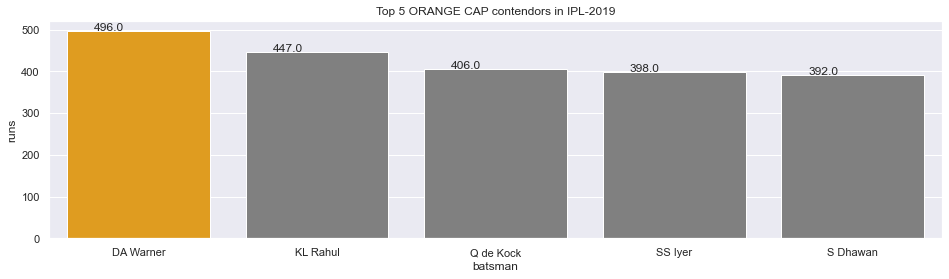

In [30]:
def orange_cap(season):
    orange_cap = delivery_metrics[delivery_metrics.season==season]
    orange_cap = orange_cap.batsman.value_counts().reset_index()
    orange_cap.columns = ['batsman','runs']
    #print(orange_cap.head(5))
    plt.subplots(figsize=(16,4))
    plt.title('Top 5 ORANGE CAP contendors in IPL-'+str(season))
    values = orange_cap.runs[:5]
    print(str(str(orange_cap.batsman[:1].values))+' won the ORANGE CAP in IPL- ',season)
    clrs = ['grey' if (x < max(values)) else 'Orange' for x in values ]
    ax=sns.barplot(x='batsman', y='runs',data=orange_cap[:5], palette=clrs) # color=clrs)
    for p in ax.patches:
          ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    plt.show()
orange_cap(2019)

### Most runs by batsman

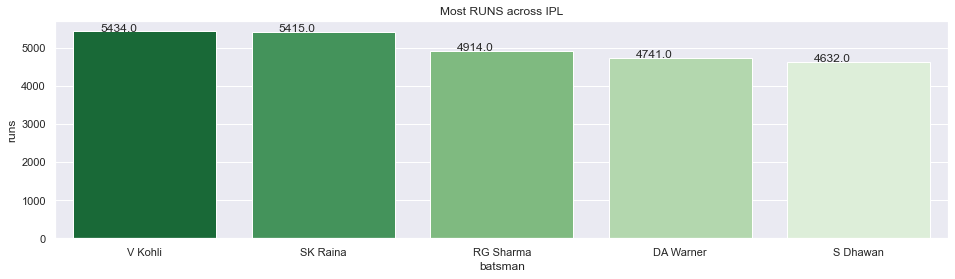

In [31]:
innings = deliveries.groupby('batsman')['match_id'].nunique().reset_index()
bat=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
bat = innings.merge(bat,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(runs,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'match_id':'Innings','ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
bat['strike_rate']=np.round(bat['ball_y']/bat['ball_x']*100,2)
bat['bat_average'] = np.round((bat.ball_y/bat.Innings),2)
bat=bat.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
bat=bat.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman'])['batsman_runs'].max().reset_index()
bat=bat.merge(compare,left_on='batsman',right_on='batsman',how='outer')
bat.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batsman_runs':'Highest_score'},axis=1,inplace=True)
batsman=bat[1:].sort_values('runs',ascending=False).head(10)
batsman.style.background_gradient(cmap="YlGn")

plt.subplots(figsize=(16,4))
plt.title("Most RUNS across IPL")
batsman = batsman.sort_values("runs",ascending=False)
ax = sns.barplot(y="runs",x='batsman',data=batsman[:5],palette=sns.color_palette('Greens_r',5))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Virat Kohli scored most runs across IPL of 5434 runs.

### Most sixes by batsman

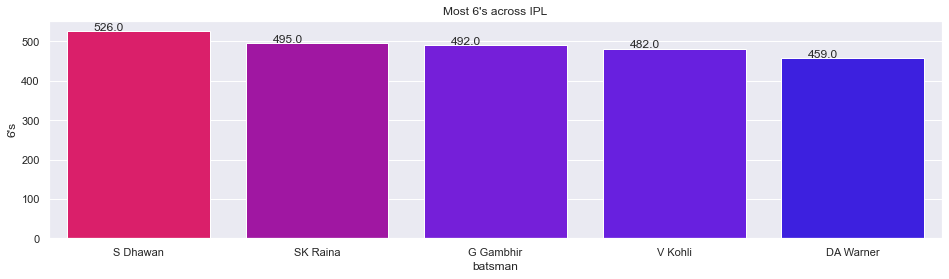

In [32]:
plt.subplots(figsize=(16,4))
plt.title("Most 6's across IPL")
batsman = batsman.sort_values("6's",ascending=False)
ax = sns.barplot(y="6's",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',10))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

Shikhar Dhawan hits most sixes

### Most fours by batsman

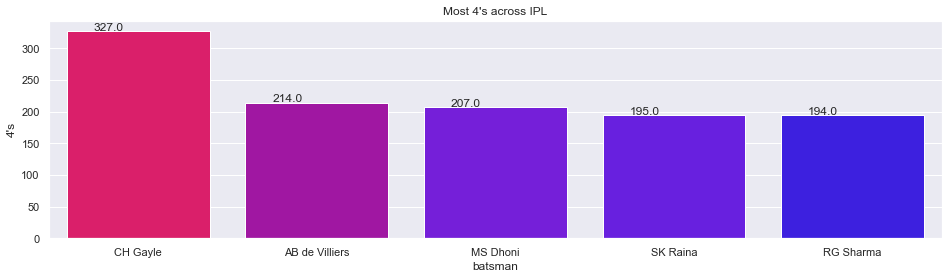

In [33]:
plt.subplots(figsize=(16,4))
plt.title("Most 4's across IPL")
batsman = batsman.sort_values("4's",ascending=False)
ax = sns.barplot(y="4's",x='batsman',data=batsman[:5],palette=sns.color_palette('prism',10))
for p in ax.patches:
     ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


Chris Gayle hits most fours

# Thank You